# Results for Paper


In [1]:
import torch
import sys
import os
import random
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sys.path.append('../')
from common import make_env, perform_action, const_disturb_five, const_jitter_force, get_frame_skip_and_timestep
from evals import *
sys.path.append('../../')
import TD3
import pandas as pd

In [26]:
dataframe = pd.DataFrame(columns=["Environment", "Result", "Reflex"])

default_timesteps = {'InvertedPendulum-v2':0.02, 'Hopper-v2': 0.002, 'Walker2d-v2': 0.002, 'InvertedDoublePendulum-v2':0.01}
default_frame_skips = {'InvertedPendulum-v2':2, 'Hopper-v2': 4, 'Walker2d-v2': 4, 'InvertedDoublePendulum-v2':5}
catastrophe_frequency = 1.0
delayed_env = True
zero_reflex = True
policy = 'TD3'
g_ratio = 0.0

# Inverted Pendulum
env_name = 'InvertedPendulum-v2'
default_timestep = default_timesteps[env_name]
default_frame_skip = default_frame_skips[env_name]
jit_duration = 0.02
response_rate = 0.02
parent_response_rate = default_timestep * default_frame_skip

for seed in range(5):
    arguments = ["reflex_fixed", policy, env_name, seed, jit_duration, g_ratio, response_rate, catastrophe_frequency,
                     delayed_env, parent_response_rate, zero_reflex]

    file_name = '_'.join([str(x) for x in arguments])
    result = np.load(f"../hybrid/results_paper/{file_name}.npy")
    dataframe.loc[len(dataframe)] = [env_name, np.max(result) * response_rate, False]
    
    
# Inverted Double Pendulum
env_name = 'InvertedDoublePendulum-v2'
default_timestep = default_timesteps[env_name]
default_frame_skip = default_frame_skips[env_name]
jit_duration = 0.02
response_rate = 0.02
parent_response_rate = default_timestep * default_frame_skip

for seed in range(5):
    arguments = ["reflex_fixed", policy, env_name, seed, jit_duration, g_ratio, response_rate, catastrophe_frequency,
                     delayed_env, parent_response_rate, zero_reflex]
    
    file_name = '_'.join([str(x) for x in arguments])
    result = np.load(f"../hybrid/results_paper/{file_name}.npy")
    dataframe.loc[len(dataframe)] = [env_name, np.max(result) * response_rate, False]
    

# Hopper
env_name = 'Hopper-v2'
default_timestep = default_timesteps[env_name]
default_frame_skip = default_frame_skips[env_name]
jit_duration = 0.004
response_rate = 0.004
parent_response_rate = default_timestep * default_frame_skip

for seed in range(5):
    arguments = ["reflex_fixed", policy, env_name, seed, jit_duration, g_ratio, response_rate, catastrophe_frequency,
                     delayed_env, parent_response_rate, zero_reflex]
    
    file_name = '_'.join([str(x) for x in arguments])
    result = np.load(f"../hybrid/results_paper/{file_name}.npy")
    dataframe.loc[len(dataframe)] = [env_name, np.max(result) * response_rate, False]
    
    
# Walker2d
env_name = 'Walker2d-v2'
default_timestep = default_timesteps[env_name]
default_frame_skip = default_frame_skips[env_name]
jit_duration = 0.004
response_rate = 0.004
parent_response_rate = default_timestep * default_frame_skip

for seed in range(5):
    arguments = ["reflex_fixed", policy, env_name, seed, jit_duration, g_ratio, response_rate, catastrophe_frequency,
                     delayed_env, parent_response_rate, zero_reflex]
    
    file_name = '_'.join([str(x) for x in arguments])
    result = np.load(f"../hybrid/results_paper/{file_name}.npy")
    dataframe.loc[len(dataframe)] = [env_name, np.max(result) * response_rate, False]

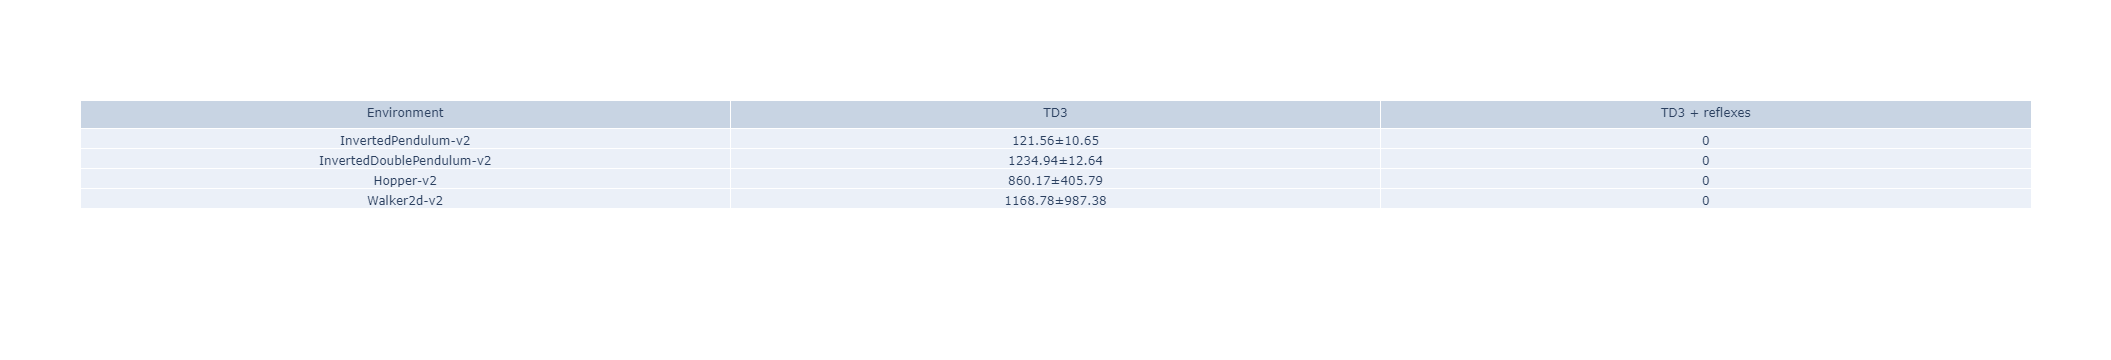

In [27]:
values = [["InvertedPendulum-v2", "InvertedDoublePendulum-v2", "Hopper-v2",  'Walker2d-v2'],]

td3s = []
for env in ["InvertedPendulum-v2", "InvertedDoublePendulum-v2", "Hopper-v2",  'Walker2d-v2']:
    td3_mean = np.mean(dataframe.loc[(dataframe["Environment"] == env) & (dataframe["Reflex"] == False)]["Result"])
    td3_std = np.std(dataframe.loc[(dataframe["Environment"] == env) & (dataframe["Reflex"] == False)]["Result"])
    td3s.append(str(round(td3_mean, 2)) + "±" + str(round(td3_std, 2)))
    
values.append(td3s)
values.append([0, 0, 0, 0])
    
fig = go.Figure(data=[go.Table(header=dict(values=['Environment', 'TD3', "TD3 + reflexes"]),
                 cells=dict(values=values))
                     ])
fig.show()

In [31]:
dataframe

,Environment,Result,Reflex
0,InvertedPendulum-v2,108.232000,False
1,InvertedPendulum-v2,116.954000,False
2,InvertedPendulum-v2,123.998000,False
3,InvertedPendulum-v2,118.310000,False
4,InvertedPendulum-v2,140.310000,False
5,InvertedDoublePendulum-v2,1233.935465,False
6,InvertedDoublePendulum-v2,1257.570046,False
7,InvertedDoublePendulum-v2,1219.991541,False
8,InvertedDoublePendulum-v2,1236.083115,False
9,InvertedDoublePendulum-v2,1227.120899,False
